# Importing Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [78]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
#Data is Clear having no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [80]:
#Three unique countries
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [81]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# DATA VISUALIZATION

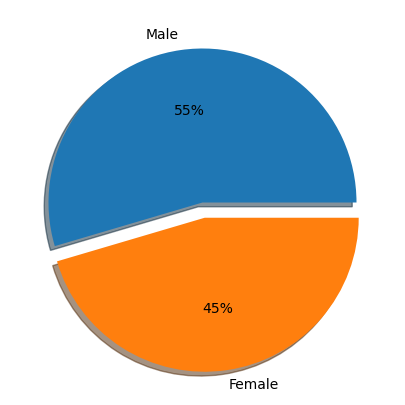

In [82]:
#Gender distribution
plt.figure(figsize = (10,5))
plt.pie(df['Gender'].value_counts().values,labels=['Male','Female'],autopct='%.f%%',explode = [0,0.1],shadow = True)
plt.show()

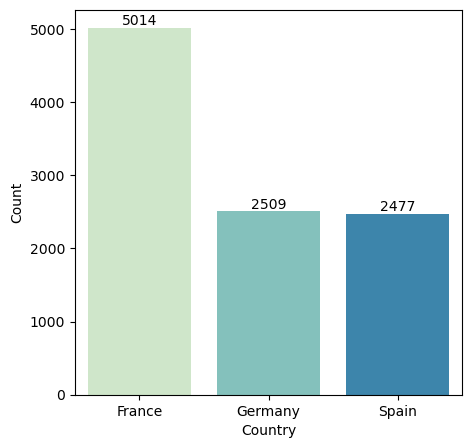

In [83]:
#Geography wise
region = df.Geography.value_counts().to_frame().reset_index()
region.columns = ['Country','Count']
plt.figure(figsize = (5,5))
ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i,)

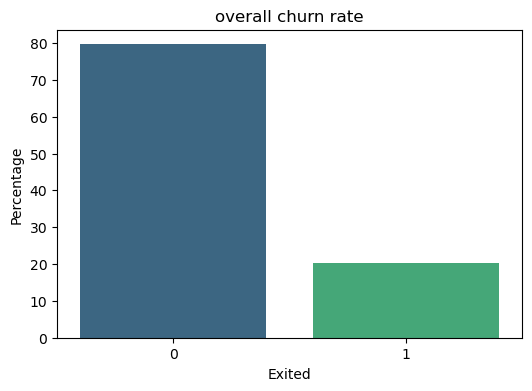

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_rate = df['Exited'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
plt.title("overall churn rate")
plt.xlabel("Exited")
plt.ylabel("Percentage")
plt.show()

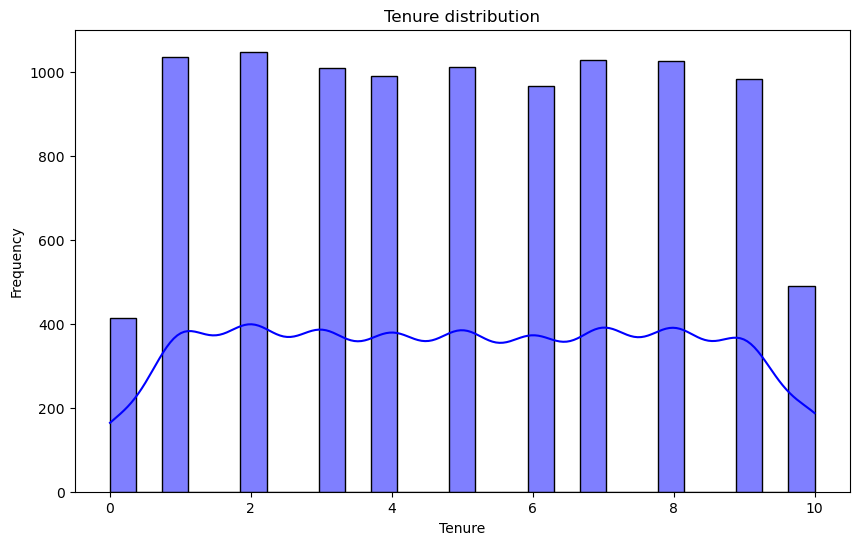

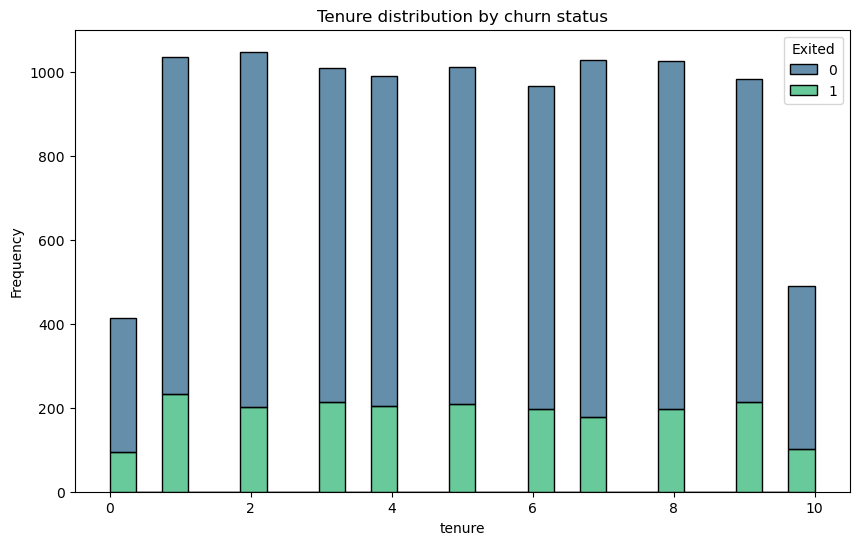

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], 
 kde=True, color='blue')
plt.title('Tenure distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue = 'Exited', multiple='stack', palette='viridis')
plt.title('Tenure distribution by churn status')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.show()

# Data Cleaning

In [8]:
#Delete unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Encoding
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Geography']=labelencoder.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
#Droping coulmn from the features
x=df.drop(columns='Exited')
y=df['Exited']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

# Logistic Regression

In [55]:
#Create Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [56]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_reg.predict(x_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

AUC-ROC: 0.5250446915609349


In [52]:
y_pred_log_reg = log_reg.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1607
           1       0.31      0.66      0.42       393

    accuracy                           0.64      2000
   macro avg       0.59      0.65      0.58      2000
weighted avg       0.77      0.64      0.68      2000



In [57]:
#Model Score
model_score=log_reg.score(x_train,y_train)
print(model_score)

0.78725


In [60]:
#Prediction
y_pred=log_reg.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [61]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.05%


In [62]:
df = pd.DataFrame(x_test)

# Save the DataFrame to a CSV fi
df.to_csv('output_fileC.csv', index=False)

In [63]:
df = pd.DataFrame(y_test)

# Save the DataFrame to a CSV fi
df.to_csv('output_fileC1.csv', index=False)

In [88]:
input_data = (359,0,0,44,6,128747.69,1,1,0,146955.71)

import numpy as np

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predict one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = log_reg.predict(input_data_reshaped)

print(prediction)


if prediction[0] == 0:
 print("the no churn attack")
else:
 print("the churn attack")

[1]
the churn attack


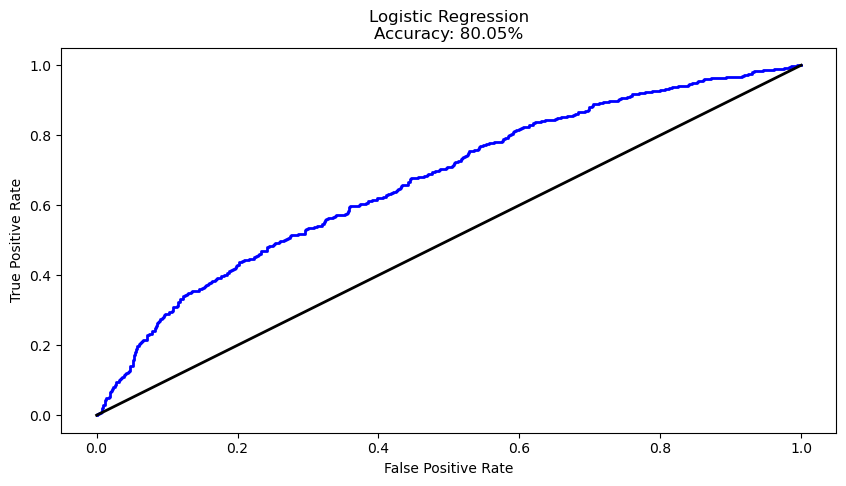

In [89]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

# Random Forest

In [90]:
#Create Random Forest Classifier model
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
#Model score
model.score(x_train,y_train)

0.999875

In [92]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [93]:
#Length
len(y_pred)

2000

In [94]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.70%


In [99]:
input_data = (500,2,0,50,5,0.0,4,1,1,83866.35)

import numpy as np

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predict one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = model.predict(input_data_reshaped)

print(prediction)


if prediction[0] == 0:
 print("the no churn attack")
else:
 print("the churn attack")

[1]
the churn attack


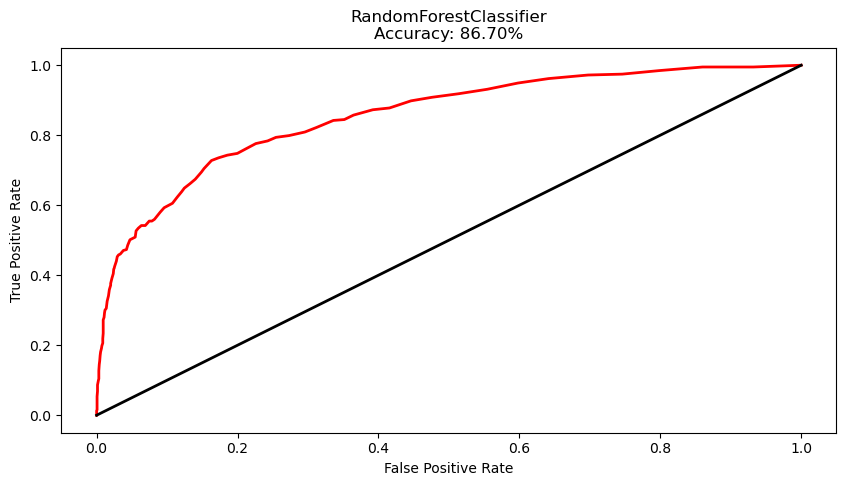

In [100]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

# Gradient Boosting

In [103]:
#Create Gradient Boosting model
model2=GradientBoostingClassifier()
model2.fit(x_train,y_train)

GradientBoostingClassifier()

In [104]:
#Model Score
model_score=model.score(x_train, y_train)
print(model_score)

0.872625


In [105]:
#Prediction
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [106]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.55%


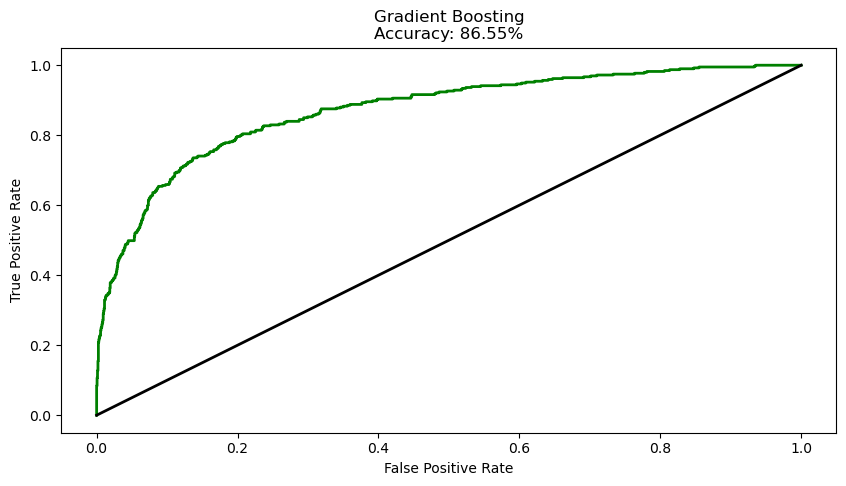

In [107]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()